# Implementation step by step of the cluster based shrinkage correlation matrix

In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as LA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
X_matrix = pd.read_csv('./data/sp_500_returns.csv', index_col='Date')
#X_matrix = X_matrix[:700]


In [3]:
X_matrix.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007950,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.000378,-0.010150,-0.001388,...,-0.017197,-0.006584,-0.010635,0.000233,-0.000283,0.033015,0.006829,-0.013534,-0.007559,0.022063
2012-01-05,0.022382,0.087475,0.006363,0.011102,0.007592,0.008835,-0.002301,-0.019082,0.007072,0.004447,...,-0.010446,0.004418,0.008880,-0.003022,0.000848,-0.014247,0.007631,0.011840,-0.001410,0.028005
2012-01-06,0.010811,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.001733,0.008427,-0.006641,...,-0.035186,-0.002933,-0.006486,-0.007463,-0.005932,-0.016797,0.007237,0.002600,-0.008192,0.001135
2012-01-09,0.026203,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.001736,-0.006616,0.019499,...,-0.002805,0.000735,0.021759,0.004464,-0.004831,0.003973,-0.003843,0.007410,-0.004557,0.013605
2012-01-10,0.018760,0.000000,0.000839,0.003580,0.011408,-0.002746,0.004655,0.017201,0.023484,0.004372,...,0.008346,0.008082,0.001825,0.002573,0.014278,0.012267,0.006206,0.020964,0.009156,0.016219


## Obtaining $R$

In [3]:
R_matrix = np.corrcoef(X_matrix.T)

In [4]:
R_matrix

array([[1.        , 0.29372562, 0.29238002, ..., 0.44798073, 0.46050623,
        0.41458942],
       [0.29372562, 1.        , 0.25589812, ..., 0.35511135, 0.2528106 ,
        0.42792454],
       [0.29238002, 0.25589812, 1.        , ..., 0.30030208, 0.27456568,
        0.34156475],
       ...,
       [0.44798073, 0.35511135, 0.30030208, ..., 1.        , 0.33233173,
        0.43178304],
       [0.46050623, 0.2528106 , 0.27456568, ..., 0.33233173, 1.        ,
        0.35792117],
       [0.41458942, 0.42792454, 0.34156475, ..., 0.43178304, 0.35792117,
        1.        ]])

In [5]:
R_matrix.shape

(460, 460)

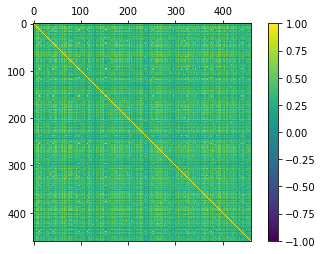

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(R_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)

## Getting the distance matrix $D$

In [7]:
D_matrix = 1 - R_matrix

In [8]:
D_matrix

array([[2.22044605e-16, 7.06274376e-01, 7.07619977e-01, ...,
        5.52019273e-01, 5.39493770e-01, 5.85410575e-01],
       [7.06274376e-01, 0.00000000e+00, 7.44101881e-01, ...,
        6.44888655e-01, 7.47189397e-01, 5.72075464e-01],
       [7.07619977e-01, 7.44101881e-01, 0.00000000e+00, ...,
        6.99697919e-01, 7.25434322e-01, 6.58435246e-01],
       ...,
       [5.52019273e-01, 6.44888655e-01, 6.99697919e-01, ...,
        0.00000000e+00, 6.67668273e-01, 5.68216961e-01],
       [5.39493770e-01, 7.47189397e-01, 7.25434322e-01, ...,
        6.67668273e-01, 0.00000000e+00, 6.42078832e-01],
       [5.85410575e-01, 5.72075464e-01, 6.58435246e-01, ...,
        5.68216961e-01, 6.42078832e-01, 2.22044605e-16]])

In [9]:
D_matrix.shape

(460, 460)

## Determining the optimal number of clusters through the eigenvalues of $R$

In [10]:
N = X_matrix.shape[1]
T = X_matrix.shape[0]

In [12]:
N

460

In [13]:
T

700

In [11]:
q = N/T
q

0.1824672748909163

In [12]:
lambda_plus = (1 + np.sqrt(q))**2
lambda_plus

2.0367910423021156

Test if the equality in (9) holds:

In [13]:
1+ 2*(np.sqrt(N/T))+ N/T

2.0367910423021156

Obtaining the eigenvectors of $R$

In [14]:
lambdas_i = LA.eigvals(R_matrix)

In [15]:
K = np.sum(lambdas_i > lambda_plus)

In [16]:
K

18

## Implementing the clustering algorithm

Notar que se está utilizando la inicialización propuesta por Begusic.

In [17]:
C_kmeans = KMeans(n_clusters=K, random_state=0, init='k-means++').fit(D_matrix)

In [18]:
C_kmeans.labels_

array([17, 13,  1, 14,  9,  7, 17, 15, 17, 14,  2, 15, 14,  3,  3,  0,  5,
        5,  2, 15, 16,  0, 14,  8, 15, 14, 16, 10,  9,  5, 11, 16, 17,  0,
        0,  0,  6, 15, 10,  2,  4,  3, 16,  4, 14, 15,  3,  5,  9,  8,  5,
        9, 13,  1,  9,  2, 11,  7, 16,  5,  8,  6, 10, 11,  1, 17, 10, 15,
        0,  2,  4,  5, 12,  9,  2, 15,  1,  2, 11,  8, 17,  2,  9,  6, 12,
        1,  1,  0, 15, 11, 12,  5,  0,  0, 16,  2,  3,  1,  4,  5,  9,  6,
        9, 12,  0, 17, 14, 17,  2, 15,  1,  0, 16,  9,  2,  3,  8,  2,  2,
        5,  7,  9,  0, 17,  2, 13, 13,  0, 12,  1, 10,  7,  4,  8,  4,  3,
        1,  6,  8,  7, 16, 16, 15,  3,  0,  3,  0,  2, 10,  6,  9,  4,  3,
        4, 10,  3,  3,  9,  3,  0, 13,  3,  8,  0,  2,  6, 17,  2,  3, 14,
       15, 15,  5,  2,  2,  2,  4, 16, 10,  8, 16, 12,  5, 10,  8,  1, 17,
       17, 10, 15, 13,  0,  5,  0,  6, 13,  5, 13, 15,  6,  2,  0,  9, 10,
       14, 12,  0,  8, 11,  9,  0,  0,  9, 10,  0, 16, 16,  0, 14, 17,  2,
        2, 16, 11,  9,  0

In [19]:
np.unique(C_kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17], dtype=int32),
 array([56, 22, 41, 24, 21, 34, 16, 10, 31, 29, 27, 18, 11, 18, 27, 29, 20,
        26]))

In [20]:
X_matrix = X_matrix.iloc[:,C_kmeans.labels_.argsort()]

In [21]:
R_matrix = np.corrcoef(X_matrix.T)
D_matrix = 1 - R_matrix

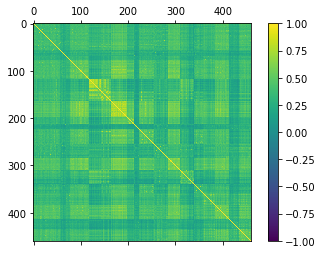

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(R_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)

## Creating the S matrix

In [74]:
subset = X_matrix.iloc[:,0:10]

In [28]:
C_kmeans_subset = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(subset.T)

In [39]:
labels = np.array([1,2,2,1,1,1,1,2,0,0])

In [33]:
R_subset = np.corrcoef(subset.T)

In [40]:
labels == 0

array([False, False, False, False, False, False, False, False,  True,
        True])

In [42]:
R_subset

array([[1.        , 0.29372562, 0.29238002, 0.44330183, 0.36852739,
        0.27126391, 0.55321856, 0.56486988, 0.52373052, 0.54664827],
       [0.29372562, 1.        , 0.25589812, 0.22990229, 0.2297495 ,
        0.14386111, 0.20689204, 0.28009811, 0.2030872 , 0.31034029],
       [0.29238002, 0.25589812, 1.        , 0.23750185, 0.29487343,
        0.0836723 , 0.28489801, 0.33681242, 0.25389971, 0.3095806 ],
       [0.44330183, 0.22990229, 0.23750185, 1.        , 0.27638957,
        0.25617966, 0.40905601, 0.46189239, 0.50061912, 0.50249654],
       [0.36852739, 0.2297495 , 0.29487343, 0.27638957, 1.        ,
        0.1566215 , 0.41233841, 0.4133466 , 0.28198528, 0.34533515],
       [0.27126391, 0.14386111, 0.0836723 , 0.25617966, 0.1566215 ,
        1.        , 0.3254793 , 0.24405802, 0.29582659, 0.25284013],
       [0.55321856, 0.20689204, 0.28489801, 0.40905601, 0.41233841,
        0.3254793 , 1.        , 0.52712043, 0.46917622, 0.44162394],
       [0.56486988, 0.28009811, 0.3368124

En este ejempo, los activos pertenecientes al cluster 0 son los 8 y 9. Entonces lo que habría que calcular sería 

$$S_{00} = \frac{1}{|C_p|(|C_p|-1)} (R_{8,9} + R_{9,8})$$

Sin incluir $R_{8,8}$ ni $R_{9,9}$

Calculando manualmente se obtendría

In [70]:
R_subset[9,8]

0.5460432848402861

In [71]:
(1/(2*(2-1)))* (R_subset[8,9] + R_subset[9,8])

0.5460432848402861

Ahora calculando mediante operaciones de matrices y slicing, se confirma que se obtendría lo mismo

In [73]:
i_label = 0
j_label = 0
constante = (1/(2*(2-1)))
constante *(R_subset[labels == i_label][:,labels == j_label] - np.identity(2)).sum()

0.5460432848402861

Para $S_{1,1}$ se tendría entonces, considerando que el índice 0, 3,4,5 y 6 están en ese cluster

$$S_{11} = \frac{1}{|C_1|(|C_1|-1)} (R_{0,3} + R_{0,4} + R_{0,5} + R_{0,6} + R_{3,0} + R_{3,4} + R_{3,5} + R_{3,6} + R_{4,0} + R_{4,3} + R_{4,5} + R_{4,6} + R_{5,0} + R_{5,3} + R_{5,4} + R_{5,6} + R_{6,0} + R_{6,3} + R_{6,4} + R_{6,5})$$

In [74]:
(1/(5*(5-1)))* (R_subset[0,3] + R_subset[0,4] + R_subset[0,5] + R_subset[0,6]+ 
                R_subset[3,0] + R_subset[3,4] + R_subset[3,5] + R_subset[3,6] +
                R_subset[4,0] + R_subset[4,3] + R_subset[4,5] + R_subset[4,6] +
                R_subset[5,0] + R_subset[5,3] + R_subset[5,4] + R_subset[5,6] +
                R_subset[6,0] + R_subset[6,3] + R_subset[6,4] + R_subset[6,5])

0.3472376144138374

In [75]:
i_label = 1
j_label = 1
constante = (1/(5*(5-1)))
constante *(R_subset[labels == i_label][:,labels == j_label] - np.identity(5)).sum()

0.3472376144138373

Se puede observar que se obtiene el mismo resultado,

Ahora para cuando p=0 y q = 2 por ejemplo, se tendría que 8 y 9 pertenecen al cluster 0 y que 1,2, y 7 pertenecen al cluster 2

$$ S_{0,2} = S_{2,0} = \frac{1}{2(2)(3)} R_{8,1} + R_{8,2} + R_{8,7}+ R_{9,1} + R_{9,2} + R_{9,7}$$

Calculando de forma manual:

In [76]:
(1/(2*2*3)) * (R_subset[8,1] + R_subset[8,2] + R_subset[8,7] + 
                R_subset[9,1] + R_subset[9,2] + R_subset[9,7] )

0.1798009682863309

In [105]:
1/(2*2*3)

0.08333333333333333

Y ahora de forma vectorizada

In [80]:
i_label = 0
j_label = 2
constante = (1/(2*2*3))
constante *(R_subset[labels == i_label][:,labels == j_label]).sum()

0.1798009682863309

In [77]:
R_subset[labels == 0]

array([[0.52373052, 0.2030872 , 0.25389971, 0.50061912, 0.28198528,
        0.29582659, 0.46917622, 0.54980916, 1.        , 0.54604328],
       [0.54664827, 0.31034029, 0.3095806 , 0.50249654, 0.34533515,
        0.25284013, 0.44162394, 0.53089467, 0.54604328, 1.        ]])

In [78]:
R_subset[labels == 0][:,labels == 2]

array([[0.2030872 , 0.25389971, 0.54980916],
       [0.31034029, 0.3095806 , 0.53089467]])

Se puede observar que se obtiene el mismo resultado

In [103]:
labels

array([1, 2, 2, 1, 1, 1, 1, 2, 0, 0])

Si fuera p = 0 y q = 1, considerando que p tiene los índices 8 y 9 y q tiene los índices 0, 3,4,5 y 6, entonces se tiene

$$ S_{0,1} = S_{1,0} = \frac{1}{2(2)(5)} R_{8,0} + R_{8,4} + R_{8,4}+ R_{8,5} + R_{8,6} +R_{9,0} + R_{9,4} + R_{9,4}+ R_{9,5} + R_{9,6} $$

In [81]:
np.unique(labels)

array([0, 1, 2])

In [30]:
C_kmeans.labels_.sort()

In [31]:
C_kmeans.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  8,  8

In [23]:
def get_s_matrix(R_matrix, labels):
    label, count_label = np.unique(labels, return_counts=True)
    S_matrix = np.zeros((len(label), len(label)))
    for i in label:
        for j in label:
            if i == j:
                constant = 1/(count_label[i]* (count_label[i]-1))
                S_matrix[i,j] = (constant *(R_matrix[labels == i][:,labels == j] - np.identity(count_label[i])).sum())
            else:
                constant = 1/(2* count_label[i]*count_label[j])

                S_matrix[i,j] = (constant *(R_matrix[labels == i][:,labels == j]).sum())
    return S_matrix

In [155]:
S_matrix_subset = get_s_matrix(R_subset, labels)
S_matrix_subset

array([[0.54604328, 0.20801409, 0.17980097],
       [0.20801409, 0.34723761, 0.15029145],
       [0.17980097, 0.15029145, 0.29093622]])

Probando ya la función en los datos reales. 

In [32]:
S_matrix = get_s_matrix(R_matrix,C_kmeans.labels_)
S_matrix

array([[0.38596119, 0.14574392, 0.20921595, 0.16060151, 0.18523691,
        0.22778122, 0.16616879, 0.09865443, 0.18642401, 0.16739128,
        0.23534142, 0.17420495, 0.12187297, 0.16033431, 0.17824469,
        0.22728741, 0.12843242, 0.19862167],
       [0.14574392, 0.23028422, 0.15801481, 0.11915438, 0.13551401,
        0.17035719, 0.12983251, 0.08503212, 0.13833054, 0.13326331,
        0.1740509 , 0.13405231, 0.10355058, 0.12208313, 0.13905353,
        0.16582412, 0.10402915, 0.15118967],
       [0.20921595, 0.15801481, 0.51367897, 0.14016501, 0.19256015,
        0.28733363, 0.22845181, 0.09510208, 0.22767668, 0.1628692 ,
        0.27798579, 0.16618766, 0.10292743, 0.19277136, 0.20104684,
        0.24071413, 0.12941877, 0.20009973],
       [0.16060151, 0.11915438, 0.14016501, 0.6844866 , 0.26562365,
        0.15025969, 0.09379758, 0.07558535, 0.12564255, 0.1472542 ,
        0.17243952, 0.22314238, 0.18563845, 0.10342027, 0.10792922,
        0.2043217 , 0.08349462, 0.15551438],
    

## Get $\tilde{R}$ Matrix

Se hace una preuba, notando que se optimizan los for loops dado que la matriz es simétrica y es posible disminuir el número de iteraciones

In [22]:
label, count_label = np.unique(labels, return_counts=True)
R_tilde_matrix = np.zeros((len(labels),len(labels)))
for i in range(len(labels)):
    for j in range(i,len(labels)):
        R_tilde_matrix[i,j] = R_tilde_matrix[j,i] = S_matrix_subset[labels[i], labels[j]]

NameError: name 'labels' is not defined

In [149]:
labels

array([1, 2, 2, 1, 1, 1, 1, 2, 0, 0])

Se puede observar que el resultado es el esperado:

In [164]:
R_tilde_matrix

array([[0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.2909362

Se procede entonces a crear la función:

In [25]:
def get_R_tilde(S_matrix, labels):
    label = np.unique(labels)
    R_tilde_matrix = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(i,len(labels)):
            R_tilde_matrix[i,j] = R_tilde_matrix[j,i] = S_matrix[labels[i], labels[j]]
    return R_tilde_matrix
    

In [160]:
labels

array([1, 2, 2, 1, 1, 1, 1, 2, 0, 0])

In [161]:
S_matrix_subset

array([[0.54604328, 0.20801409, 0.17980097],
       [0.20801409, 0.34723761, 0.15029145],
       [0.17980097, 0.15029145, 0.29093622]])

Se prueba la función y se comprueba que los resultados son los esperados

In [159]:
get_R_tilde(S_matrix_subset, labels)

array([[0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.2909362

Por último, se prueba también la función en los datos reales

In [33]:
R_tilde = get_R_tilde(S_matrix,C_kmeans.labels_)
R_tilde

array([[0.38596119, 0.38596119, 0.38596119, ..., 0.19862167, 0.19862167,
        0.19862167],
       [0.38596119, 0.38596119, 0.38596119, ..., 0.19862167, 0.19862167,
        0.19862167],
       [0.38596119, 0.38596119, 0.38596119, ..., 0.19862167, 0.19862167,
        0.19862167],
       ...,
       [0.19862167, 0.19862167, 0.19862167, ..., 0.50445129, 0.50445129,
        0.50445129],
       [0.19862167, 0.19862167, 0.19862167, ..., 0.50445129, 0.50445129,
        0.50445129],
       [0.19862167, 0.19862167, 0.19862167, ..., 0.50445129, 0.50445129,
        0.50445129]])

## Get $R^\text{clust}$ 

Para obtener $R^{\text{clust}}$, se determina entonces la relación lineal entre $\tilde{R}$ y $R$

In [27]:
def get_R_clust(R_matrix, R_tilde_matrix, alpha):
    if not(0<=alpha and 1>= alpha):
        return np.NaN
    return alpha*R_tilde_matrix + (1-alpha)*R_matrix

In [61]:
R_clust = get_R_clust(R_matrix, R_tilde, 1)
R_clust

array([[0.38596119, 0.38596119, 0.38596119, ..., 0.19862167, 0.19862167,
        0.19862167],
       [0.38596119, 0.38596119, 0.38596119, ..., 0.19862167, 0.19862167,
        0.19862167],
       [0.38596119, 0.38596119, 0.38596119, ..., 0.19862167, 0.19862167,
        0.19862167],
       ...,
       [0.19862167, 0.19862167, 0.19862167, ..., 0.50445129, 0.50445129,
        0.50445129],
       [0.19862167, 0.19862167, 0.19862167, ..., 0.50445129, 0.50445129,
        0.50445129],
       [0.19862167, 0.19862167, 0.19862167, ..., 0.50445129, 0.50445129,
        0.50445129]])

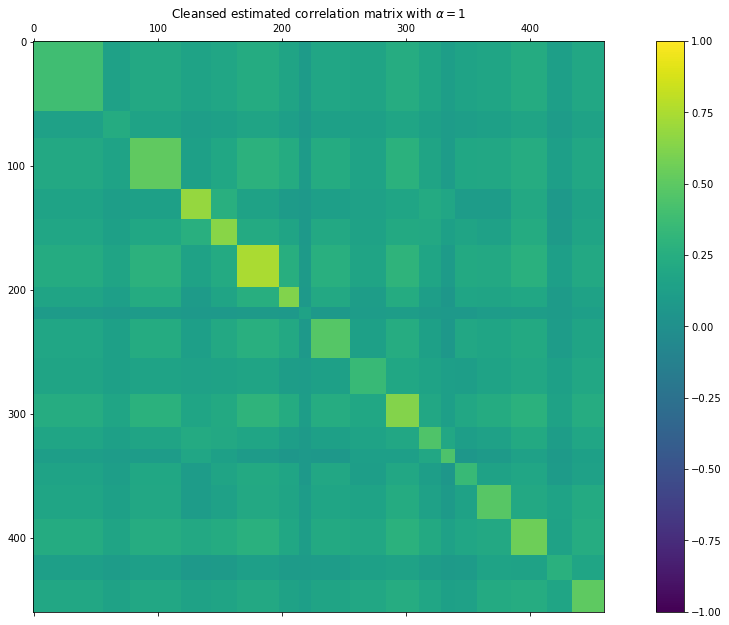

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)
cax = ax.matshow(R_clust, vmin=-1, vmax=1)
plt.title(r"Cleansed estimated correlation matrix with $\alpha = 1$")
fig.colorbar(cax)
plt.savefig('./_static/cleansed_matrix_alpha_1.jpg')

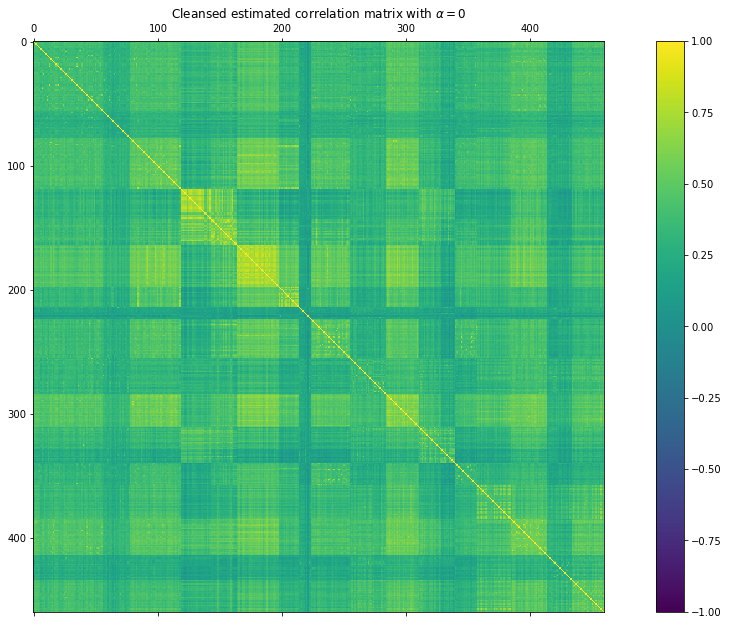

In [63]:
R_clust = get_R_clust(R_matrix, R_tilde, 0)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)
cax = ax.matshow(R_clust, vmin=-1, vmax=1)
plt.title(r"Cleansed estimated correlation matrix with $\alpha = 0$")
fig.colorbar(cax)
plt.savefig('./_static/cleansed_matrix_alpha_0.jpg')

In [33]:
R_clust

array([[0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.13526335, 0.13526335, 0.27297861, ..., 0.13526335, 0.13526335,
        0.14705365],
       ...,
       [0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.2124667 , 0.2124667 , 0.14705365, ..., 0.2124667 , 0.2124667 ,
        0.55124918]])

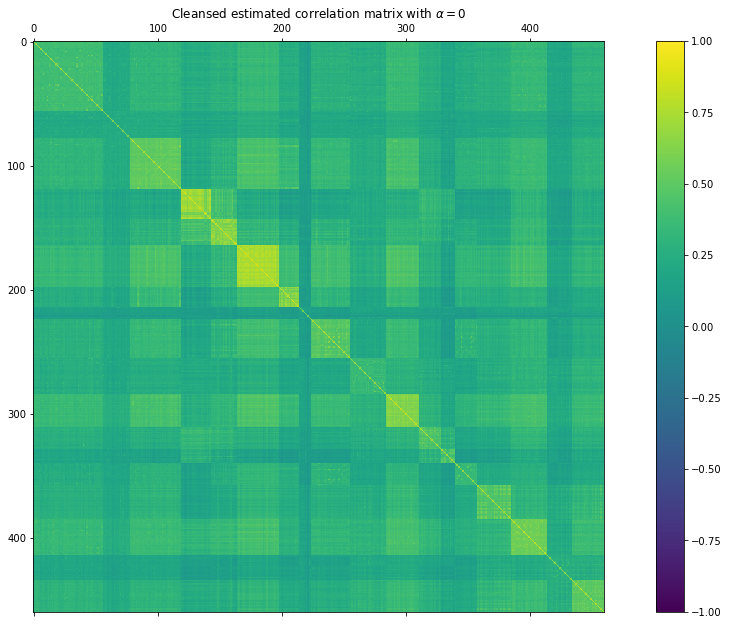

In [64]:
R_clust = get_R_clust(R_matrix, R_tilde, 0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(18.5, 10.5)
cax = ax.matshow(R_clust, vmin=-1, vmax=1)
plt.title(r"Cleansed estimated correlation matrix with $\alpha = 0$")
fig.colorbar(cax)
plt.savefig('./_static/cleansed_matrix_alpha_1_2.jpg')